In [1]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from openTSNE import TSNE
import umap

# 改成自己的路徑
df_origin = pd.read_csv('C:\\school\\SchoolProgram\\NTUST_CSIE_DS\\DataSet\\Preprocessing_T3.csv')

#shape
print("Original Data Shape:", df_origin.shape)

Original Data Shape: (1800106, 18)


PCA 降維

In [2]:
# 標準化
scaler = StandardScaler()

#auto drop non-numeric, nan columns
df_numeric = df_origin.select_dtypes(include=[np.number]).dropna(axis=1)
X_scaled = scaler.fit_transform(df_numeric.drop(columns=['label']))

# PCA降維
pca = PCA(n_components=8, random_state=42)
pca_result = pca.fit_transform(X_scaled)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.28259492 0.1783797  0.09935903 0.08583215 0.08297642 0.0602426
 0.05253116 0.04701306]
PCA方差值: [4.52152128 2.85407675 1.58974538 1.37331516 1.32762347 0.96388219
 0.84049905 0.75220945]


視覺化PCA

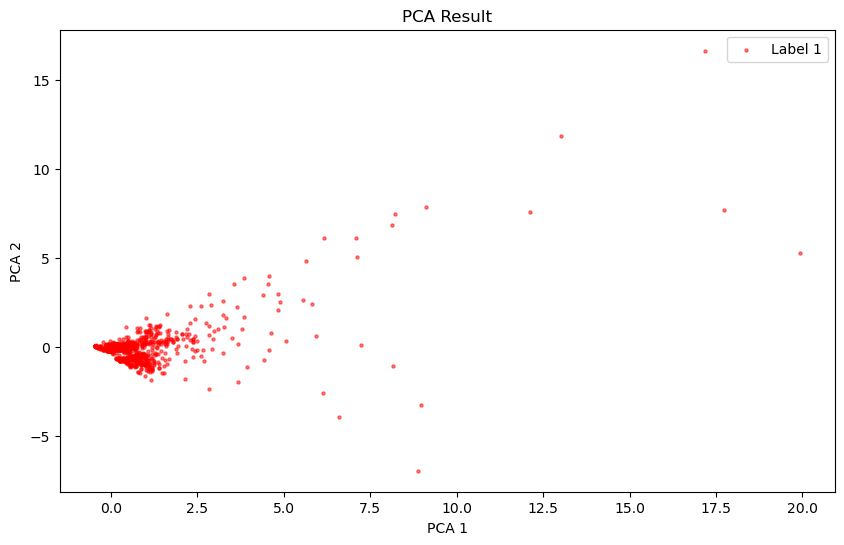

In [4]:
colors = ['red' if label == 1 else 'blue' for label in df_numeric['label']]

#version1: plot all points
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=5, alpha=0.5, c=colors)
plt.title('PCA Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(False)
plt.legend()
plt.show()

#version2: only plot label = 1
mask = df_numeric['label'] == 1

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[mask, 0], pca_result[mask, 1], s=5, alpha=0.5, c='red', label='Label 1')
plt.title('PCA Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(False)
plt.legend()
plt.show()

T-SNE

C:\Users\0978w\AppData\Local\Temp\ipykernel_7768\3837948935.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


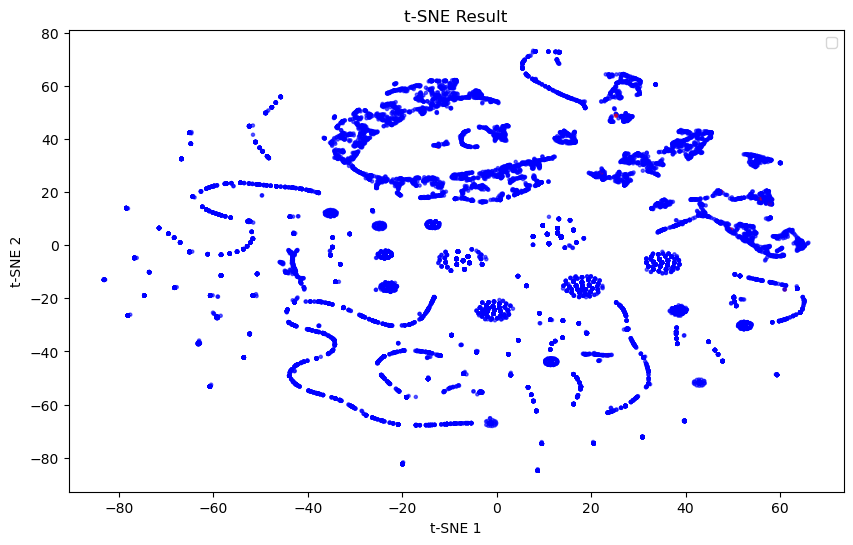

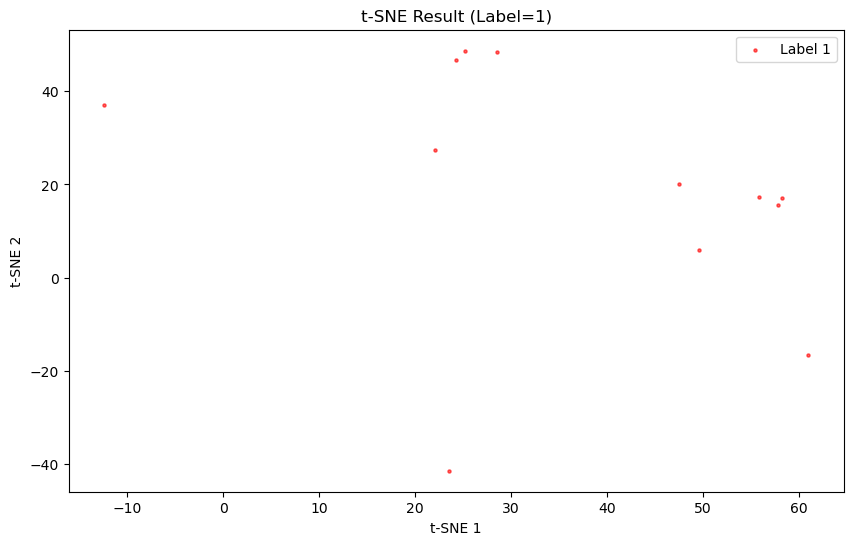

In [5]:
#1% smaple of data for t-SNE
np.random.seed(42)
sample_indices = np.random.choice(pca_result.shape[0], size=int(0.01 * pca_result.shape[0]), replace=False)
pca_sample = pca_result[sample_indices]
label_sample = df_numeric['label'].to_numpy()[sample_indices]

tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
)
train_reduced = tsne.fit(pca_sample)

# version1: plot all points
colors_sample = ['red' if l == 1 else 'blue' for l in label_sample]
plt.figure(figsize=(10,6))
plt.scatter(train_reduced[:,0], train_reduced[:,1], s=5, alpha=0.6, c=colors_sample)
plt.title('t-SNE Result')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(False)
plt.legend()
plt.show()

# version2: only plot label = 1
mask_sample = label_sample == 1
plt.figure(figsize=(10,6))
plt.scatter(train_reduced[mask_sample,0], train_reduced[mask_sample,1], s=5, alpha=0.6, c='red', label='Label 1')
plt.title('t-SNE Result (Label=1)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(False)
plt.legend()
plt.show()

UMP

c:\Users\0978w\.conda\envs\ntust_ds\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


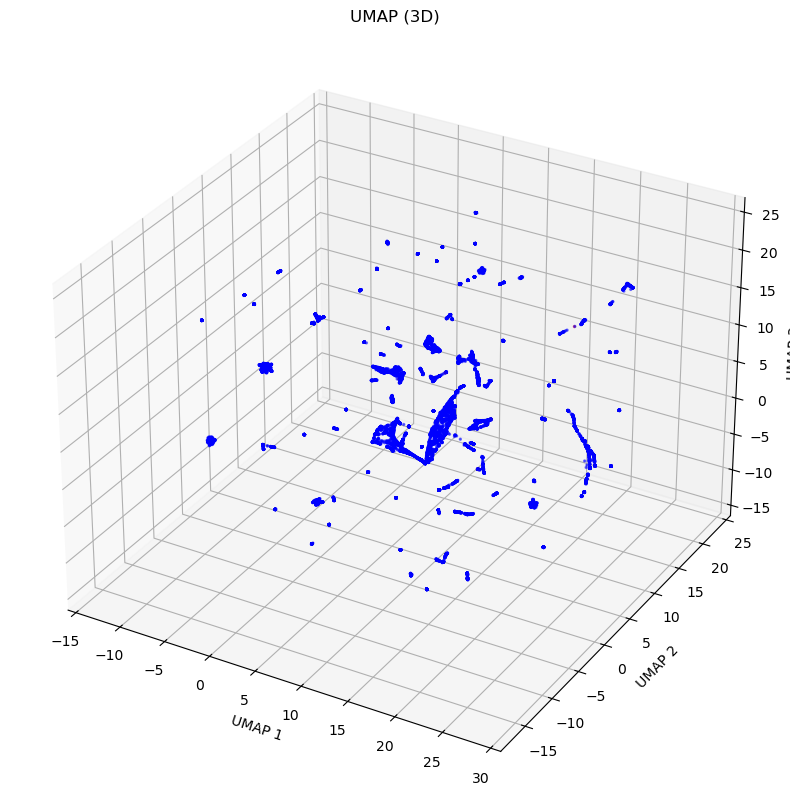

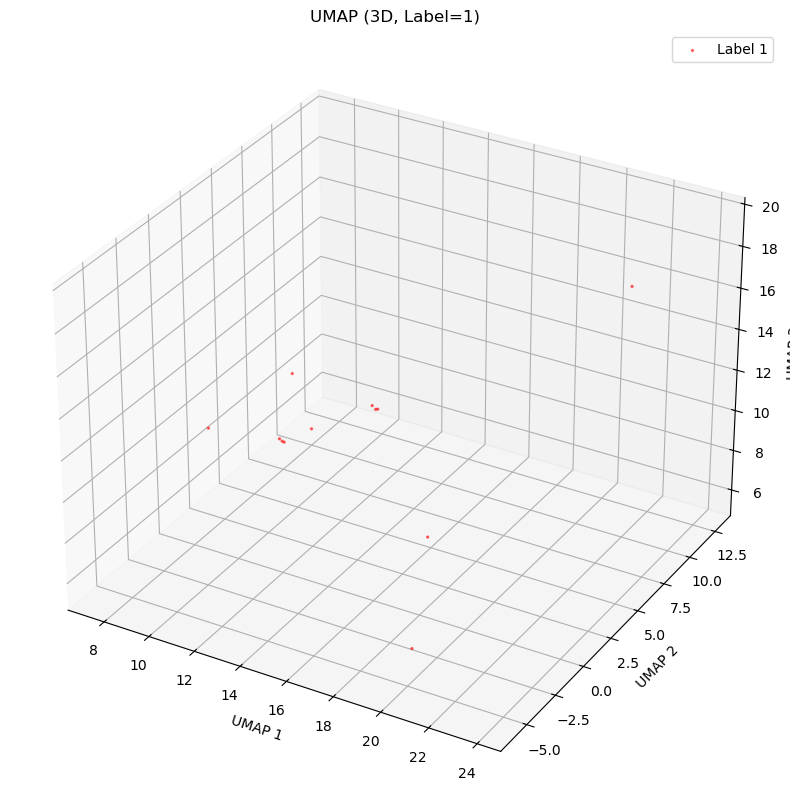

In [6]:
#10% smaple of data
np.random.seed(42)
sample_indices = np.random.choice(pca_result.shape[0], size=int(0.01 * pca_result.shape[0]), replace=False)
X_sample = pca_result[sample_indices]
label_sample = df_numeric['label'].to_numpy()[sample_indices]

reducer = umap.UMAP(n_components=3, n_neighbors=40, random_state=42)
X_umap = reducer.fit_transform(X_sample)

# version1: plot all points (3D)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors_sample = ['red' if l == 1 else 'blue' for l in label_sample]
ax.scatter(X_umap[:,0], X_umap[:,1], X_umap[:,2], s=2, alpha=0.5, c=colors_sample)
ax.set_title("UMAP (3D)")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
plt.show()

# version2: only plot label = 1 (3D)
mask_sample = label_sample == 1
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap[mask_sample,0], X_umap[mask_sample,1], X_umap[mask_sample,2], s=2, alpha=0.5, c='red', label='Label 1')
ax.set_title("UMAP (3D, Label=1)")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
plt.legend()
plt.show()